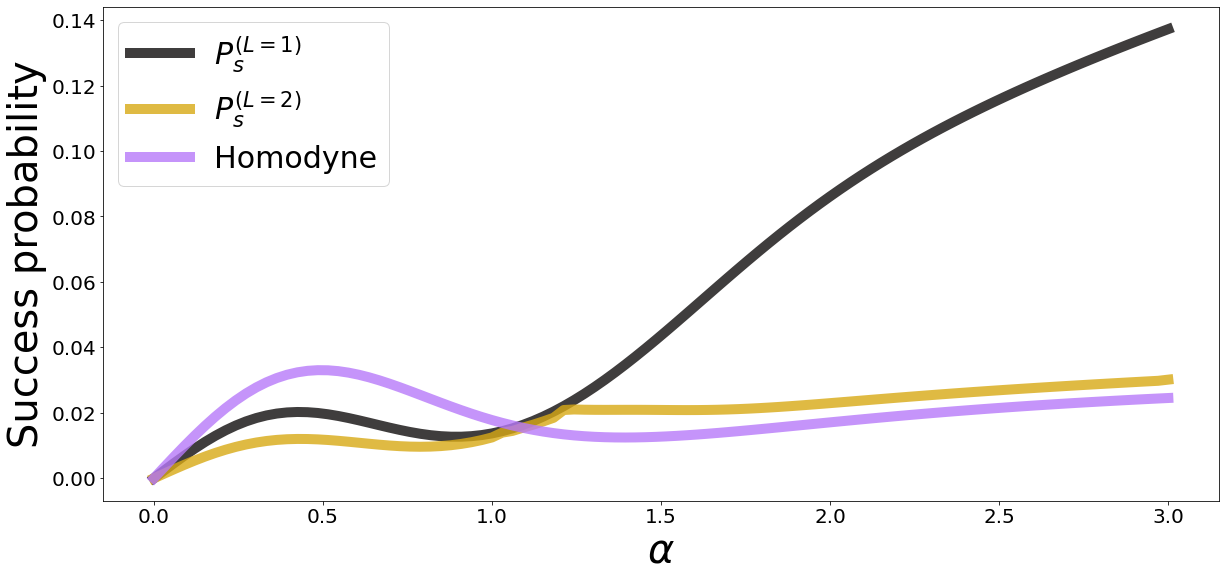

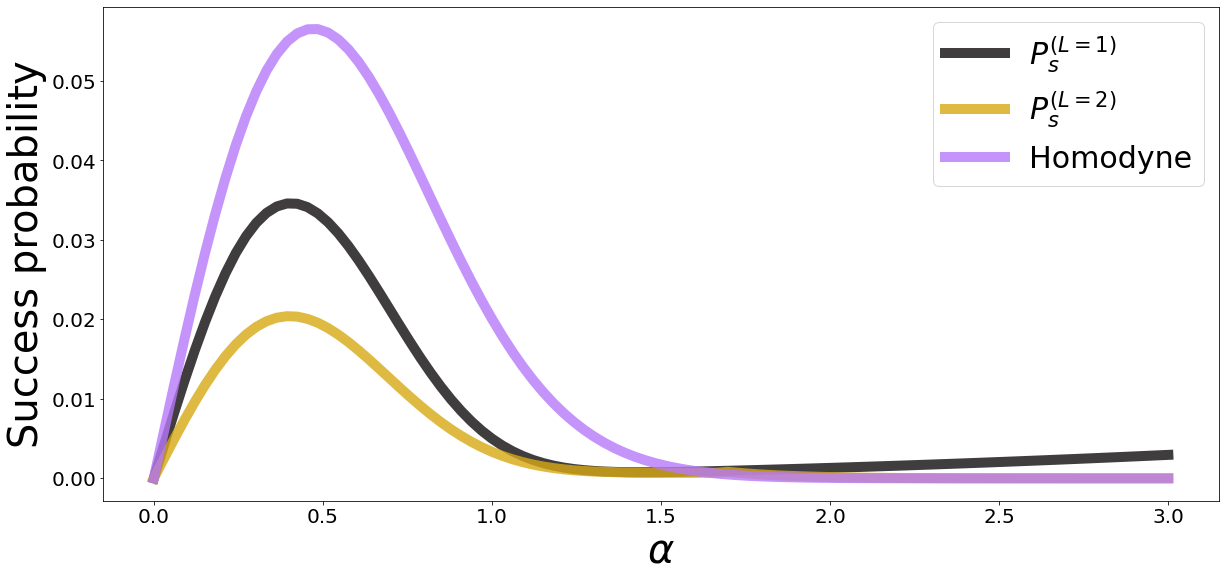

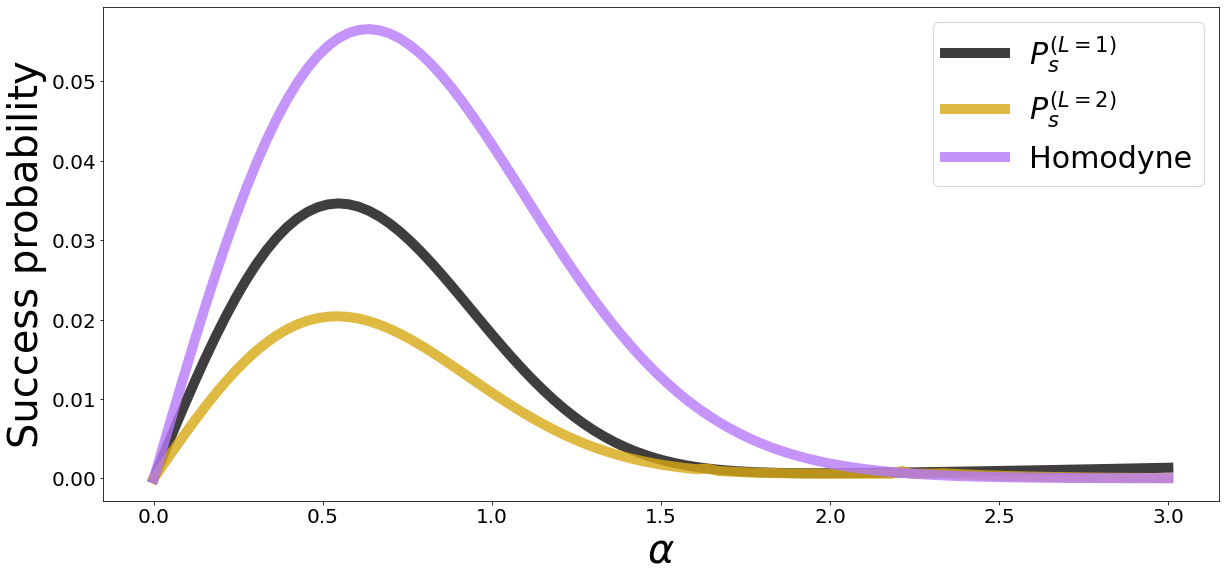

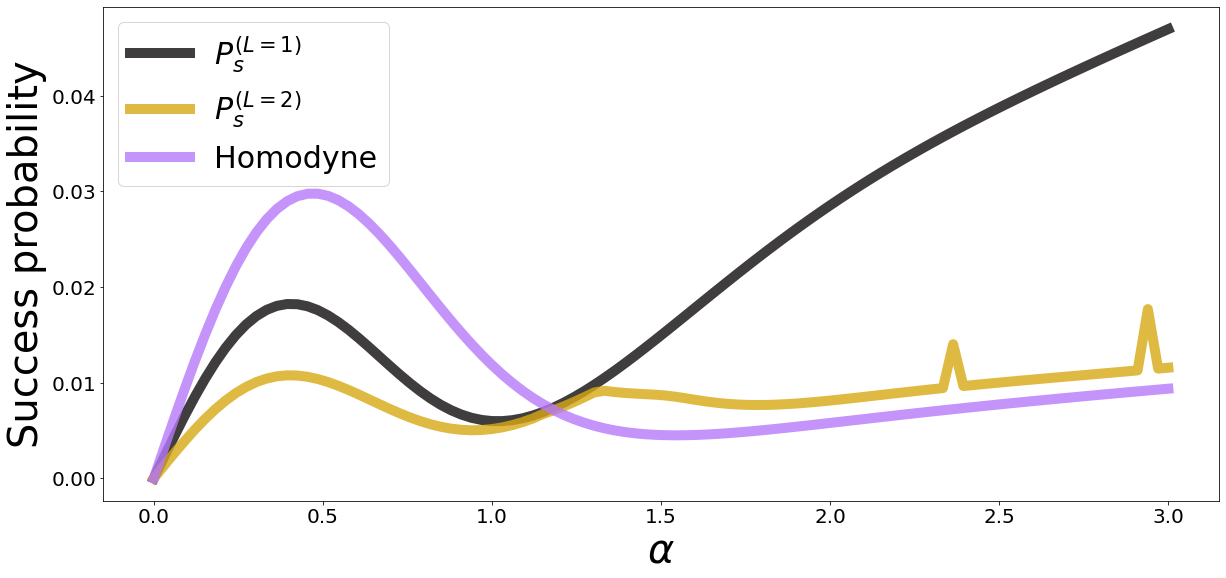

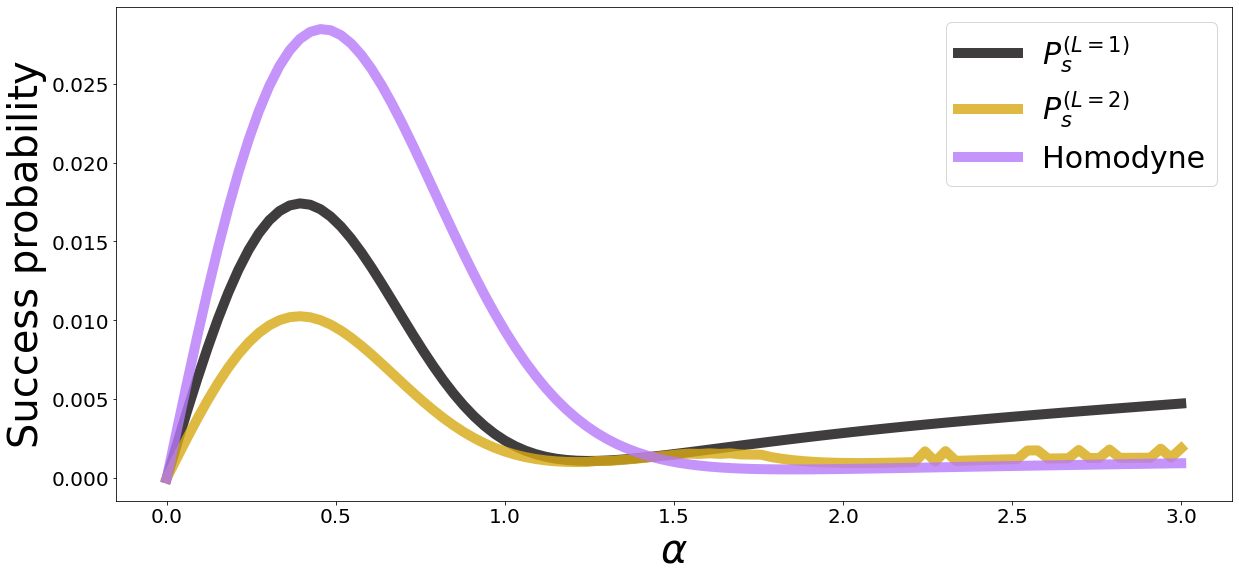

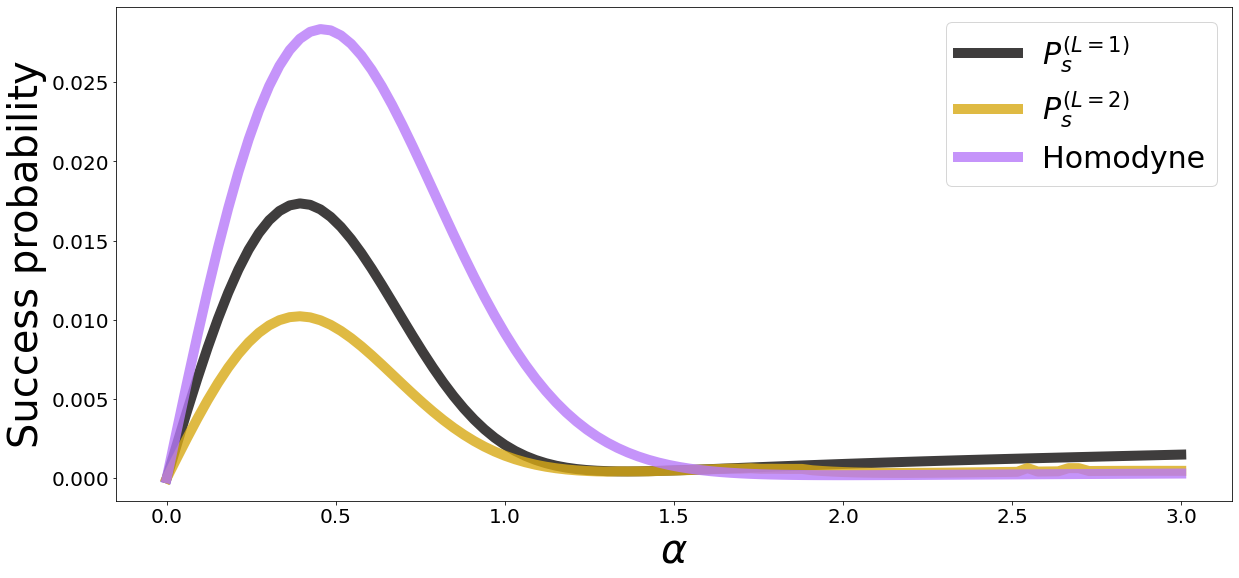

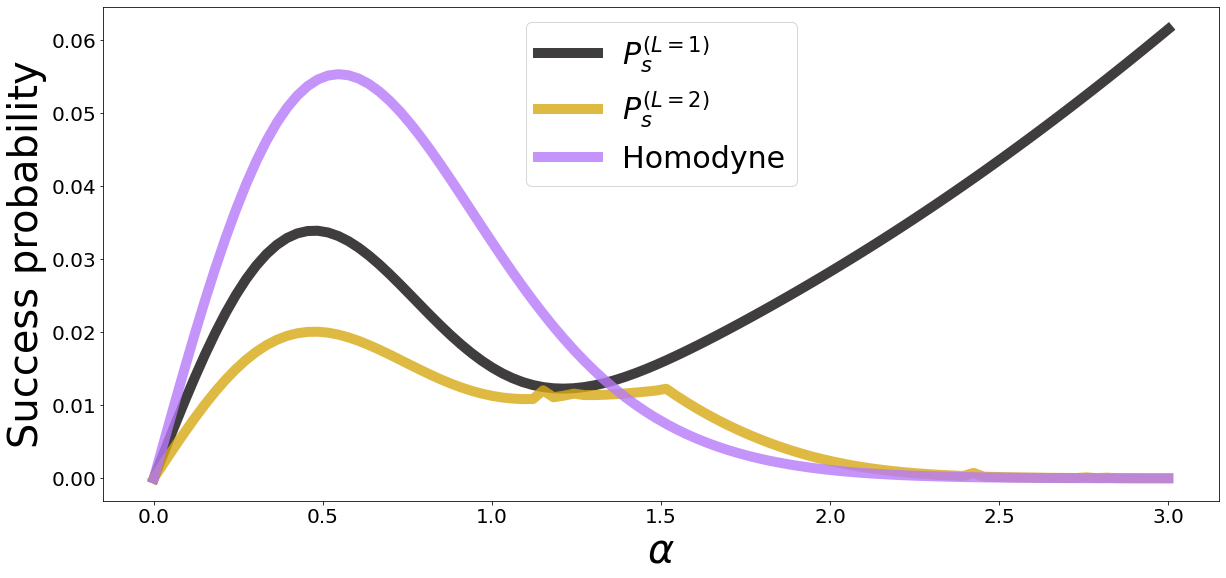

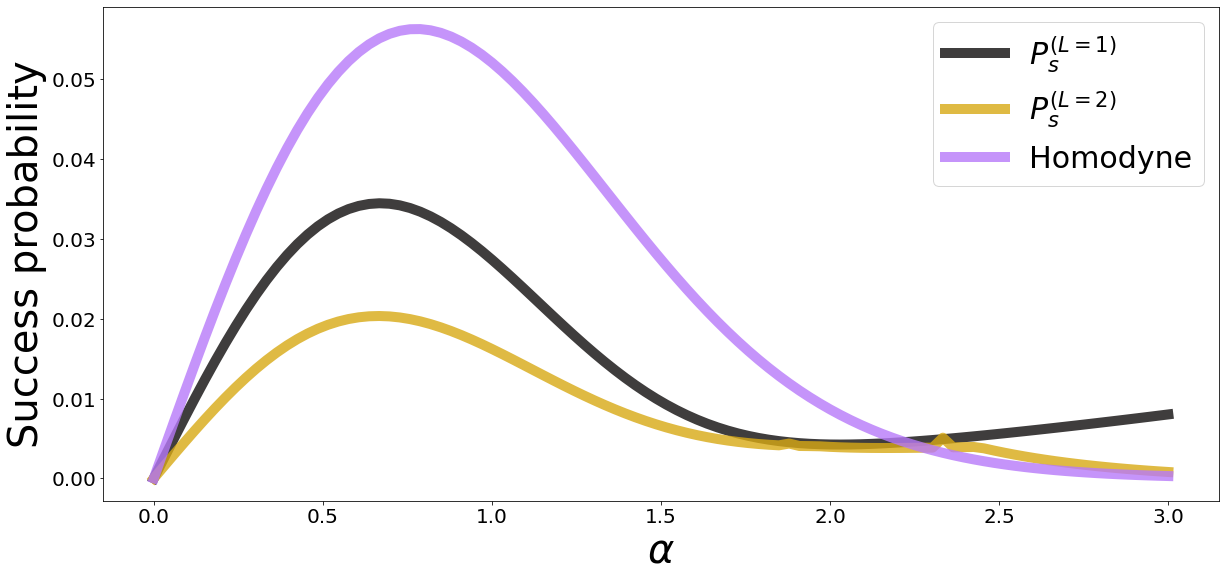

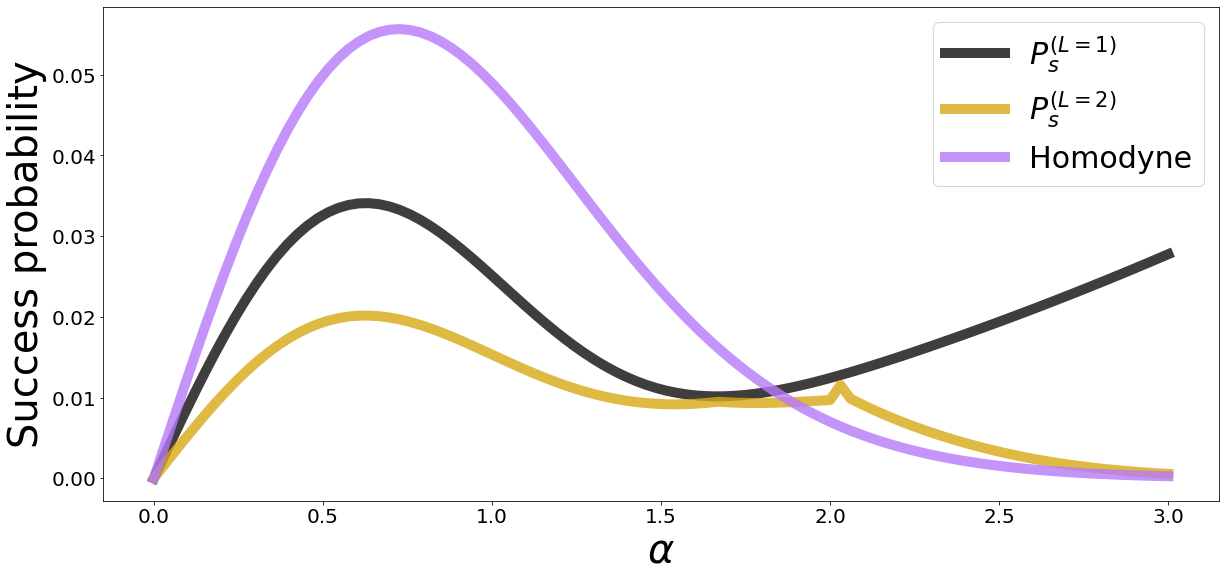

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os


amps=np.linspace(0,3,100)
ind=len(amps)


channels = {}
channels[1] = [[.5,.5],[.01,1]]
channels[2] = [[.5,.5],[.9, 1.]]
channels[3] = [[.5,.5],[.5, .55]]
channels[4] = [[.5,.5],[.001, 1.]]
channels[5] = [[.5,.5],[.00001, 1.]]
channels[6] = [[.5,.5],[.000001, 1.]]
channels[7] = [[.5,.5],[.5, .9]]
channels[8] = [[.5,.5],[.3, .4]]
channels[9] = [[.5,.5],[.3, .5]]

for caseid in range(1,10):
    

    colors={"1L":list(np.array([15,12,12])/255.),
           "2L":list(np.array([216,169,20])/255.),
           "H": list(np.array([183,121,249])/255.)}

    s2=np.load("data_cases/{}/ar_2L_s.npy".format(caseid))
    fun2=np.load("data_cases/{}/ar_2L_betas.npy".format(caseid))#,fun2)
    s1=np.load("data_cases/{}/ar_1L_s.npy".format(caseid))#,s1)
    fun1=np.load("data_cases/{}/ar_1L_betas.npy".format(caseid))#,fun1)
    homodynes_values=np.load("data_cases/{}/homodynes.npy".format(caseid))#,homodynes_values)
    helstroms_values=np.load("data_cases/{}/helstroms.npy".format(caseid))#,helstroms_values)


    lw=10
    al=0.8
    fig1=plt.figure(figsize=(20,20))
    plt.subplot(211)
    plt.plot(amps,helstroms_values-s1, color=colors["1L"], linewidth=lw,label=r'$P^{(L=1)}_s$', alpha=al)
    plt.plot(amps,helstroms_values-s2,color=colors["2L"], linewidth=lw, label=r'$P^{(L=2)}_s$', alpha=al)
    plt.plot(amps,helstroms_values-homodynes_values, color=colors["H"],  linewidth=lw,label="Homodyne", alpha=al)
    plt.ylabel("Success probability",size=40)
    plt.legend(prop={"size":30})
    plt.xticks(fontsize=20)#, rotation=90)
    plt.yticks(fontsize=20)#, rotation=90)
    plt.xlabel(r'$\alpha$',size=40)
    os.makedirs("paper_plots",exist_ok=True)
    plt.savefig("paper_plots/{}.pdf".format("etas" + str(channels[caseid][1])))

'etas[0.01, 1]'